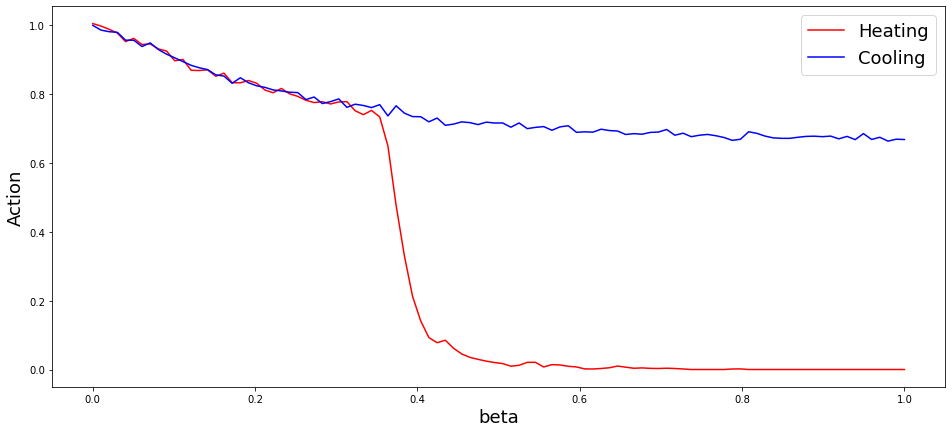

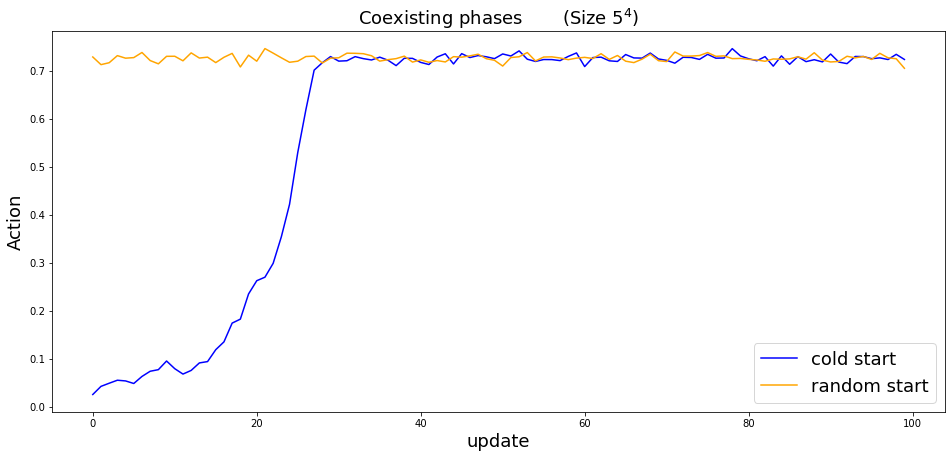

In [93]:
##################################################
#        4-Dimensional Z2 Lattice Gauge          #
#   By Hariprashad Ravikumar [hari1729@nmsu.edu] #
#   For Dr. Engelhardt's meeting (Dec 22, 2022)  #
##################################################

import numpy as np
import numpy.random as rnd
from scipy import random
import itertools
import matplotlib.pyplot as plt


N = 5 # Size of the lattice
latt1 = np.ones((N, N, N, N), dtype=int)
latt2 = np.ones((N, N, N, N), dtype=int)
latt3 = np.ones((N, N, N, N), dtype=int)
latt4 = np.ones((N, N, N, N), dtype=int)


# verifying the plaquette
#start = 1
#end = 65 + 1
#latt11 = np.arange(start, end-3, 4).reshape([N, N, N, N])
#latt22 = np.arange(start+1, end-2, 4).reshape([N, N, N, N])
#latt33 = np.arange(start+2, end-1, 4).reshape([N, N, N, N])
#latt44 = np.arange(start+3, end, 4).reshape([N, N, N, N])



rng = np.random.default_rng()
def randomstart():
    sites = itertools.product(range(N), range(N), range(N), range(N))
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt1[site] = spin
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt2[site] = spin
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt3[site] = spin
    for site in sites:
        spin = rng.integers(2)
        if spin == 0:
            spin = -1
        latt4[site] = spin
    return None


def coldstart():
    latt1[:] = 1
    latt2[:] = 1
    latt3[:] = 1
    latt4[:] = 1
    return None      

def action_axa_update2(configuration1, configuration2, configuration3, configuration4, beta):
    action_total = 0.0
    link_count = 0.0
    for y in range(N):
        for t in range(N):
            for x in range(N):
                for z in range(N):
                    #######1
                    left1 = configuration1[z,y,t,x]
                    r_right = configuration1[z,y,t,(x+2)%N]
                    i_right = configuration1[z,(y+1)%N,t,(x+1)%N]
                    o_left = configuration1[z,(y-1)%N,t,(x+1)%N]
                    z_i_right = configuration1[(z+1)%N,y,t,(x+1)%N]
                    z_o_left = configuration1[(z-1)%N,y,t,(x+1)%N]
                    #######2
                    down1 = configuration2[z,y,t,x]
                    top1 = configuration2[z,y,(t-1)%N,x]
                    r_down = configuration2[z,y,t,(x+1)%N]
                    r_top = configuration2[z,y,(t-1)%N,(x+1)%N]
                    ######3
                    i_down = configuration3[z,y,t,(x+1)%N]
                    i_top = configuration3[z,y,(t-1)%N,(x+1)%N]
                    o_down = configuration3[z,(y-1)%N,t,(x+1)%N]
                    o_top = configuration3[z,(y-1)%N,(t-1)%N,(x+1)%N]
                    ######4
                    z_i_down = configuration4[z,y,t,(x+1)%N]
                    z_i_top = configuration4[z,y,(t-1)%N,(x+1)%N]
                    z_o_down = configuration4[(z-1)%N,y,t,(x+1)%N]
                    z_o_top = configuration4[(z-1)%N,y,(t-1)%N,(x+1)%N]
                    
                    
                    #print("updating link",latt11[t,(x+1)%N,y,z])
                    #print(latt22[(t-1)%N,x,y,z],latt11[t,x,y,z],latt22[t,x,y,z])
                    #print(latt22[t,(x+1)%N,y,z],latt11[t,(x+2)%N,y,z],latt22[(t-1)%N,(x+1)%N,y,z])
                    #print(latt33[t,(x+1)%N,y,z],latt11[t,(x+1)%N,(y+1)%N,z],latt33[(t-1)%N,(x+1)%N,y,z])
                    #print(latt33[t,(x+1)%N,(y-1)%N,z],latt11[t,(x+1)%N,(y-1)%N,z],latt33[(t-1)%N,(x+1)%N,(y-1)%N,z])
                    #print(latt44[t,(x+1)%N,y,z],latt11[t,(x+1)%N,y,(z+1)%N],latt44[(t-1)%N,(x+1)%N,y,z])
                    #print(latt44[t,(x+1)%N,y,(z-1)%N],latt11[t,(x+1)%N,y,(z-1)%N],latt44[(t-1)%N,(x+1)%N,y,(z-1)%N])
                
                    staplesum_middle1 = ((top1*left1*down1))
                    staplesum_right = ((r_down*r_right*r_top))
                    staplesum_in = ((i_down*i_right*i_top))
                    staplesum_out = ((o_down*o_left*o_top))
                    z_staplesum_in = ((z_i_down*z_i_right*z_i_top))
                    z_staplesum_out = ((z_o_down*z_o_left*z_o_top))
    
                    staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out+z_staplesum_in+z_staplesum_out) 
                    bplus1 = np.exp(beta*staplesum_middle_right)
                    bminus1 = np.exp(-beta*staplesum_middle_right)
                    bplus1 = bplus1/(bplus1+bminus1)
                    link_count += 1
                    r2 = rng.uniform()
                    if r2 < bplus1:
                        configuration1[z,y,t,(x+1)%N] = 1
                        action_total += staplesum_middle_right
                    else:
                        configuration1[z,y,t,(x+1)%N] = -1
                        action_total -= staplesum_middle_right

    for y in range(N):
        for t in range(N):
            for x in range(N):
                for z in range(N):
                    #######1
                    left1 = configuration2[x,z,y,t]
                    r_right = configuration2[(x+2)%N,z,y,t]
                    i_right = configuration2[(x+1)%N,z,(y+1)%N,t]
                    o_left = configuration2[(x+1)%N,z,(y-1)%N,t]
                    z_i_right = configuration2[(x+1)%N,(z+1)%N,y,t]
                    z_o_left = configuration2[(x+1)%N,(z-1)%N,y,t]
                    #######2
                    down1 = configuration3[x,z,y,t]
                    top1 = configuration3[x,z,y,(t-1)%N]
                    r_down = configuration3[(x+1)%N,z,y,t]
                    r_top = configuration3[(x+1)%N,z,y,(t-1)%N]
                    ######3
                    i_down = configuration4[(x+1)%N,z,y,t]
                    i_top = configuration4[(x+1)%N,z,y,(t-1)%N]
                    o_down = configuration4[(x+1)%N,z,(y-1)%N,t]
                    o_top = configuration4[(x+1)%N,z,(y-1)%N,(t-1)%N]
                    ######4
                    z_i_down = configuration1[(x+1)%N,z,y,t]
                    z_i_top = configuration1[(x+1)%N,z,y,(t-1)%N]
                    z_o_down = configuration1[(x+1)%N,(z-1)%N,y,t]
                    z_o_top = configuration1[(x+1)%N,(z-1)%N,y,(t-1)%N]
                    
                    #print("updating link",latt22[t,(x+1)%N,y,z])
                    #print(latt33[(t-1)%N,x,y,z],latt22[t,x,y,z],latt33[t,x,y,z])
                    #print(latt33[t,(x+1)%N,y,z],latt22[t,(x+2)%N,y,z],latt33[(t-1)%N,(x+1)%N,y,z])
                    #print(latt44[t,(x+1)%N,y,z],latt22[t,(x+1)%N,(y+1)%N,z],latt44[(t-1)%N,(x+1)%N,y,z])
                    #print(latt44[t,(x+1)%N,(y-1)%N,z],latt22[t,(x+1)%N,(y-1)%N,z],latt44[(t-1)%N,(x+1)%N,(y-1)%N,z])
                    #print(latt11[t,(x+1)%N,y,z],latt22[t,(x+1)%N,y,(z+1)%N],latt11[(t-1)%N,(x+1)%N,y,z])
                    #print(latt11[t,(x+1)%N,y,(z-1)%N],latt22[t,(x+1)%N,y,(z-1)%N],latt11[(t-1)%N,(x+1)%N,y,(z-1)%N])
                
                    staplesum_middle1 = ((top1*left1*down1))
                    staplesum_right = ((r_down*r_right*r_top))
                    staplesum_in = ((i_down*i_right*i_top))
                    staplesum_out = ((o_down*o_left*o_top))
                    z_staplesum_in = ((z_i_down*z_i_right*z_i_top))
                    z_staplesum_out = ((z_o_down*z_o_left*z_o_top))
    
                    staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out+z_staplesum_in+z_staplesum_out) 
                    bplus1 = np.exp(beta*staplesum_middle_right)
                    bminus1 = np.exp(-beta*staplesum_middle_right)
                    bplus1 = bplus1/(bplus1+bminus1)
                    link_count += 1
                    r1 = rng.uniform()
                    if r1 < bplus1:
                        configuration2[(x+1)%N,z,y,t] = 1
                        action_total += staplesum_middle_right
                    else:
                        configuration2[(x+1)%N,z,y,t] = -1
                        action_total -= staplesum_middle_right

    for y in range(N):
        for t in range(N):
            for x in range(N):
                for z in range(N):
                    #######1
                    left1 = configuration3[t,x,z,y]
                    r_right = configuration3[t,(x+2)%N,z,y]
                    i_right = configuration3[t,(x+1)%N,z,(y+1)%N]
                    o_left = configuration3[t,(x+1)%N,z,(y-1)%N]
                    z_i_right = configuration3[t,(x+1)%N,(z+1)%N,y]
                    z_o_left = configuration3[t,(x+1)%N,(z-1)%N,y]
                    #######2
                    down1 = configuration4[t,x,z,y]
                    top1 = configuration4[(t-1)%N,x,z,y]
                    r_down = configuration4[t,(x+1)%N,z,y]
                    r_top = configuration4[(t-1)%N,(x+1)%N,z,y]
                    ######3
                    i_down = configuration1[t,(x+1)%N,z,y]
                    i_top = configuration1[(t-1)%N,(x+1)%N,z,y]
                    o_down = configuration1[t,(x+1)%N,z,(y-1)%N]
                    o_top = configuration1[(t-1)%N,(x+1)%N,z,(y-1)%N]
                    ######4
                    z_i_down = configuration2[t,(x+1)%N,z,y]
                    z_i_top = configuration2[(t-1)%N,(x+1)%N,z,y]
                    z_o_down = configuration2[t,(x+1)%N,(z-1)%N,y]
                    z_o_top = configuration2[(t-1)%N,(x+1)%N,(z-1)%N,y]
                    
                    
                    #print("updating link",latt33[t,(x+1)%N,y,z])
                    #print(latt44[(t-1)%N,x,y,z],latt33[t,x,y,z],latt44[t,x,y,z])
                    #print(latt44[t,(x+1)%N,y,z],latt33[t,(x+2)%N,y,z],latt44[(t-1)%N,(x+1)%N,y,z])
                    #print(latt11[t,(x+1)%N,y,z],latt33[t,(x+1)%N,(y+1)%N,z],latt11[(t-1)%N,(x+1)%N,y,z])
                    #print(latt11[t,(x+1)%N,(y-1)%N,z],latt33[t,(x+1)%N,(y-1)%N,z],latt11[(t-1)%N,(x+1)%N,(y-1)%N,z])
                    #print(latt22[t,(x+1)%N,y,z],latt33[t,(x+1)%N,y,(z+1)%N],latt22[(t-1)%N,(x+1)%N,y,z])
                    #print(latt22[t,(x+1)%N,y,(z-1)%N],latt33[t,(x+1)%N,y,(z-1)%N],latt22[(t-1)%N,(x+1)%N,y,(z-1)%N])
                
                    staplesum_middle1 = ((top1*left1*down1))
                    staplesum_right = ((r_down*r_right*r_top))
                    staplesum_in = ((i_down*i_right*i_top))
                    staplesum_out = ((o_down*o_left*o_top))
                    z_staplesum_in = ((z_i_down*z_i_right*z_i_top))
                    z_staplesum_out = ((z_o_down*z_o_left*z_o_top))
    
                    staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out+z_staplesum_in+z_staplesum_out) 
                    bplus1 = np.exp(beta*staplesum_middle_right)
                    bminus1 = np.exp(-beta*staplesum_middle_right)
                    bplus1 = bplus1/(bplus1+bminus1)
                    link_count += 1
                    r1 = rng.uniform()
                    if r1 < bplus1:
                        configuration3[t,(x+1)%N,z,y] = 1
                        action_total += staplesum_middle_right
                    else:
                        configuration3[t,(x+1)%N,z,y] = -1
                        action_total -= staplesum_middle_right

    for y in range(N):
        for t in range(N):
            for x in range(N):
                for z in range(N):
                   #######1
                    left1 = configuration4[y,t,x,z]
                    r_right = configuration4[y,t,(x+2)%N,z]
                    i_right = configuration4[(y+1)%N,t,(x+1)%N,z]
                    o_left = configuration4[(y-1)%N,t,(x+1)%N,z]
                    z_i_right = configuration4[y,t,(x+1)%N,(z+1)%N]
                    z_o_left = configuration4[y,t,(x+1)%N,(z-1)%N]
                    #######2
                    down1 = configuration1[y,t,x,z]
                    top1 = configuration1[y,(t-1)%N,x,z]
                    r_down = configuration1[y,t,(x+1)%N,z]
                    r_top = configuration1[y,(t-1)%N,(x+1)%N,z]
                    ######3
                    i_down = configuration2[y,t,(x+1)%N,z]
                    i_top = configuration2[y,(t-1)%N,(x+1)%N,z]
                    o_down = configuration2[(y-1)%N,t,(x+1)%N,z]
                    o_top = configuration2[(y-1)%N,(t-1)%N,(x+1)%N,z]
                    ######4
                    z_i_down = configuration3[y,t,(x+1)%N,z]
                    z_i_top = configuration3[y,(t-1)%N,(x+1)%N,z]
                    z_o_down = configuration3[y,t,(x+1)%N,(z-1)%N]
                    z_o_top = configuration3[y,(t-1)%N,(x+1)%N,(z-1)%N]
                    
                    #print("updating link",latt44[t,(x+1)%N,y,z])
                    #print(latt11[(t-1)%N,x,y,z],latt44[t,x,y,z],latt11[t,x,y,z])
                    #print(latt11[t,(x+1)%N,y,z],latt44[t,(x+2)%N,y,z],latt11[(t-1)%N,(x+1)%N,y,z])
                    #print(latt22[t,(x+1)%N,y,z],latt44[t,(x+1)%N,(y+1)%N,z],latt22[(t-1)%N,(x+1)%N,y,z])
                    #print(latt22[t,(x+1)%N,(y-1)%N,z],latt44[t,(x+1)%N,(y-1)%N,z],latt22[(t-1)%N,(x+1)%N,(y-1)%N,z])
                    #print(latt33[t,(x+1)%N,y,z],latt44[t,(x+1)%N,y,(z+1)%N],latt33[(t-1)%N,(x+1)%N,y,z])
                    #print(latt33[t,(x+1)%N,y,(z-1)%N],latt44[t,(x+1)%N,y,(z-1)%N],latt33[(t-1)%N,(x+1)%N,y,(z-1)%N])
                
                    staplesum_middle1 = ((top1*left1*down1))
                    staplesum_right = ((r_down*r_right*r_top))
                    staplesum_in = ((i_down*i_right*i_top))
                    staplesum_out = ((o_down*o_left*o_top))
                    z_staplesum_in = ((z_i_down*z_i_right*z_i_top))
                    z_staplesum_out = ((z_o_down*z_o_left*z_o_top))
    
                    staplesum_middle_right = (staplesum_middle1+staplesum_right+staplesum_in+staplesum_out+z_staplesum_in+z_staplesum_out) 
                    bplus1 = np.exp(beta*staplesum_middle_right)
                    bminus1 = np.exp(-beta*staplesum_middle_right)
                    bplus1 = bplus1/(bplus1+bminus1)
                    link_count += 1
                    r1 = rng.uniform()
                    if r1 < bplus1:
                        configuration4[y,t,(x+1)%N,z] = 1
                        action_total += staplesum_middle_right
                    else:
                        configuration4[y,t,(x+1)%N,z] = -1
                        action_total -= staplesum_middle_right
    #print(link_count)
    return 1.-action_total/(N**4*4.*6.), configuration1, configuration2, configuration3

def main(beta_arr):
    coldstart()
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta in enumerate(beta_arr):
        action, confi1, confi2, confi3  = action_axa_update2(latt1,latt2,latt3,latt4,beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.linspace(1., 0., 100)
beta_arr2 = np.linspace(0., 1., 100)


act_heating = main(beta_arr1)
act_cooling = main(beta_arr2)

plt.subplots(figsize=(16, 7))
plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.show()

def main2(beta_arr):
    randomstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action, confi1, confi2, confi3  = action_axa_update2(latt1,latt2,latt3,latt4,beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.ones(100)*0.44068679351

act_coldstart = main(beta_arr1)

act_randomstart = main2(beta_arr1)

plt.subplots(figsize=(16, 7))
plt.plot(act_coldstart, color='blue',label= 'cold start' )
plt.plot(act_randomstart, color='orange',label= 'random start' )
plt.xlabel("update", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Coexisting phases       (Size $%.f^4$)"%(N), fontsize=18)
plt.legend( fontsize=18)
plt.show()

